# Signal Processing Exercises

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.rcParams.update({'font.size': 20})

## Exercise

Generate a 10-second random signal with 0.01-second sampling interval and plot it. (Tip: you should use [`np.random.random()`](https://docs.scipy.org/doc/numpy-1.14.0/reference/routines.random.html))

(-2.0, 2.0)

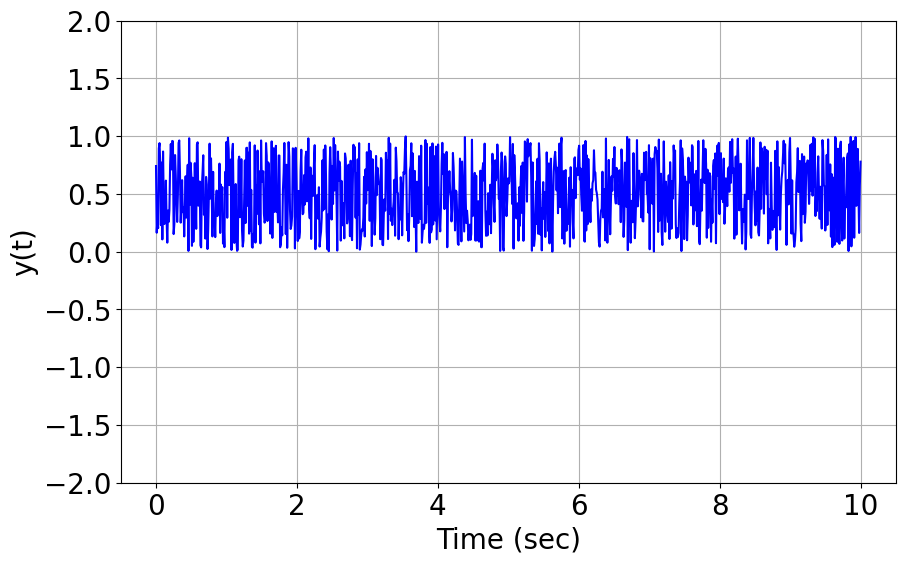

In [43]:
# YOUR CODE HERE

x = np.linspace(0, 10, 1000)
y = np.random.random(x.shape)

plt.figure(figsize=(10,6))
plt.plot(x,y, 'b-')
plt.xlabel('Time (sec)')
plt.ylabel('y(t)')
plt.grid()
plt.ylim([-2,2])

**Question**

Is the signal continuous or discrete? Analog or digital?

> Answer: Discrete and digital.

## ECG Example
The file `ecg.txt` contains 15,000 electrocardiogram data points, sampled at 1,000 Hz. Plot the signal with the appropriate time axis.

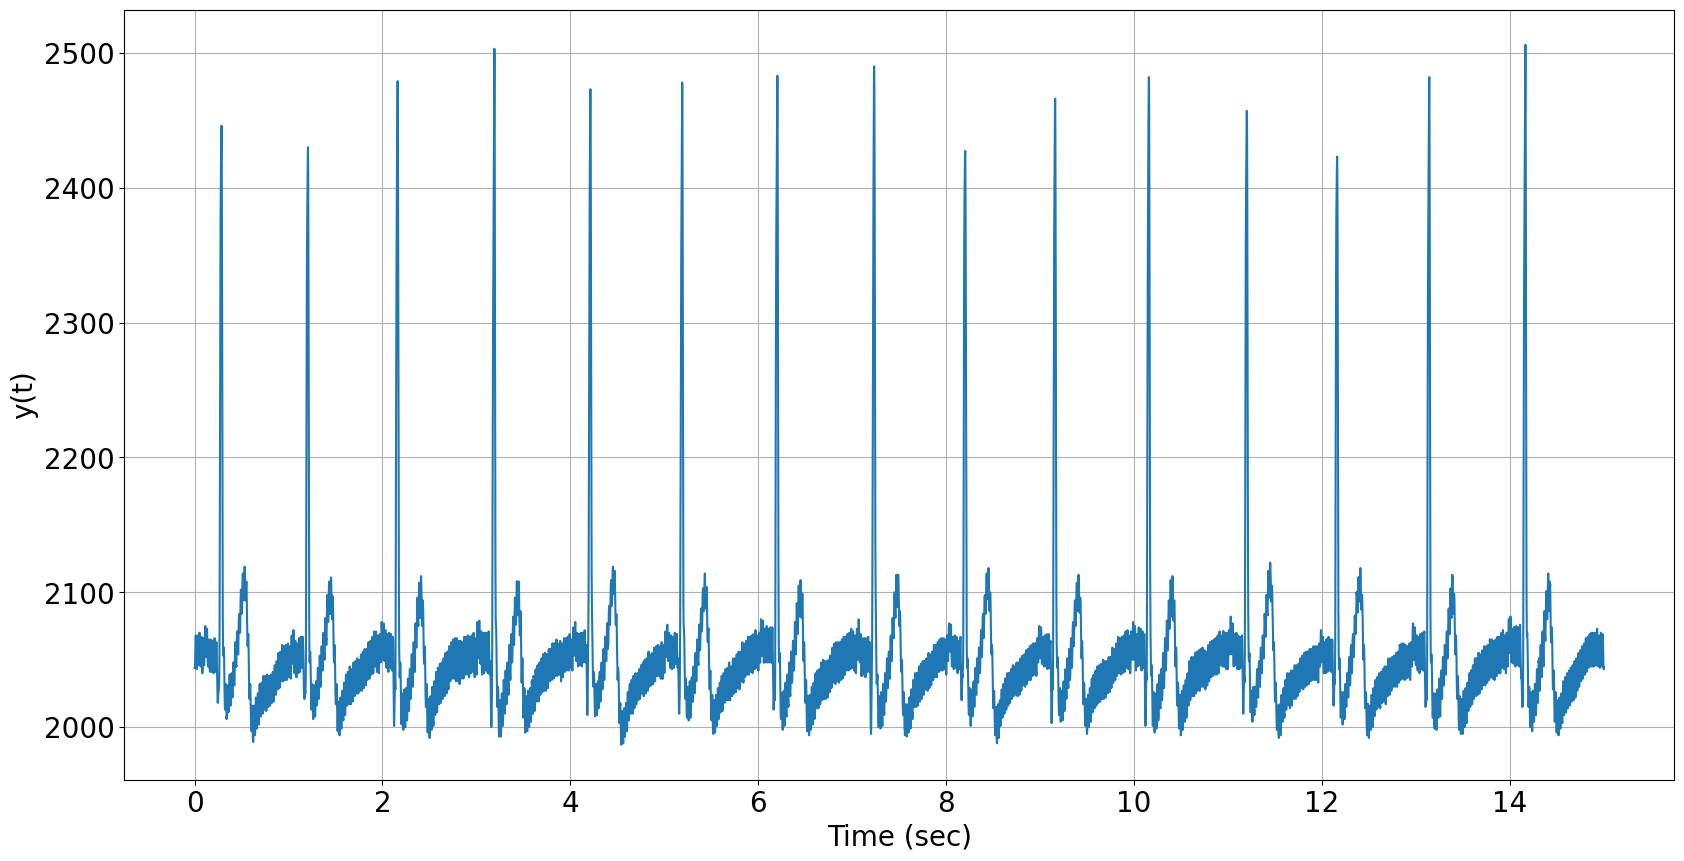

In [19]:
# Load the ECG example data
ecg_url = 'https://raw.githubusercontent.com/MedlyticsUniversal/Data/main/Week2/ecg.txt'
ecg_microvolts = np.loadtxt(ecg_url, skiprows=4)

sampling_interval = 1/1000
duration = 15000 * sampling_interval
t = np.arange(0, duration, sampling_interval)

# YOUR CODE HERE
#t = ecg_microvolts[:0]
y = np.cos(2*np.pi*t)

plt.figure(figsize=(20,10))
plt.plot(t,ecg_microvolts)
plt.xlabel('Time (sec)')
plt.ylabel('y(t)')
plt.grid()
#plt.xlim([0,3000])

**Question**

Estimate the frequency and amplitude of the above ECG signal—NOT using code!

> Answer: The amplitude of the ECG signal is 250, and the frequency is 1 second. 

### Exercise #1

Generate and plot a sinusoidal signal with frequency 0.2 HZ and amplitude of 1.5.

(0.0, 10.0)

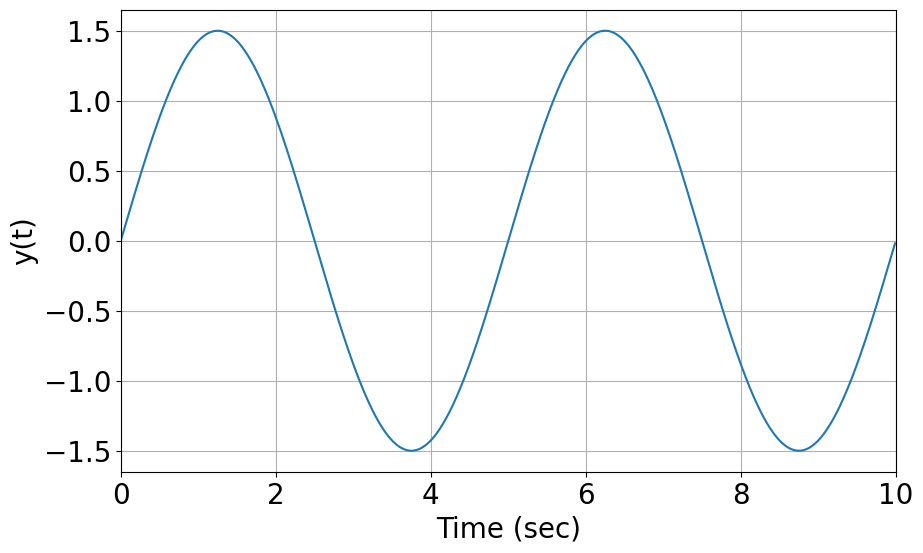

In [53]:
# YOUR CODE HERE

frequency = 0.2
amplitude = 1.5
duration = 10

sampling_interval = 0.01
t = np.arange(0, duration, sampling_interval)

y = np.sin(2*np.pi*frequency * t)*amplitude

plt.figure(figsize=(10,6))
plt.plot(t,y)
plt.xlabel('Time (sec)')
plt.ylabel('y(t)')
plt.grid()
plt.xlim([0,10])

### Exercise #2

Consider the signal shown below (the sum of two sinusoids) for this question. How many points do you need in your subsample to completely determine the signal? What frequencies do you have in your signal?

(-2.0, 2.0)

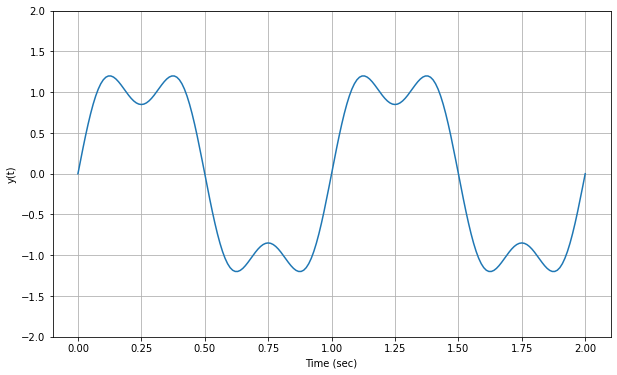

In [ ]:
t = np.linspace(0,2,201)
y = (4/np.pi)*np.sin(2*np.pi*t) + (4/(3*np.pi))*np.sin(6*np.pi*t)

plt.figure(figsize=(10,6))
plt.plot(t,y)
plt.xlabel('Time (sec)')
plt.ylabel('y(t)')
plt.grid()
plt.ylim([-2,2])

> Answer: There are 2 frequencies (1 hz and 3 hz), and you need to subsample 6 points per second. 

### Exercise #3

Plot the peaks from the ECG signal. You can take a look at `scipy.signal`'s documentation for [`find_peaks()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.find_peaks.html).

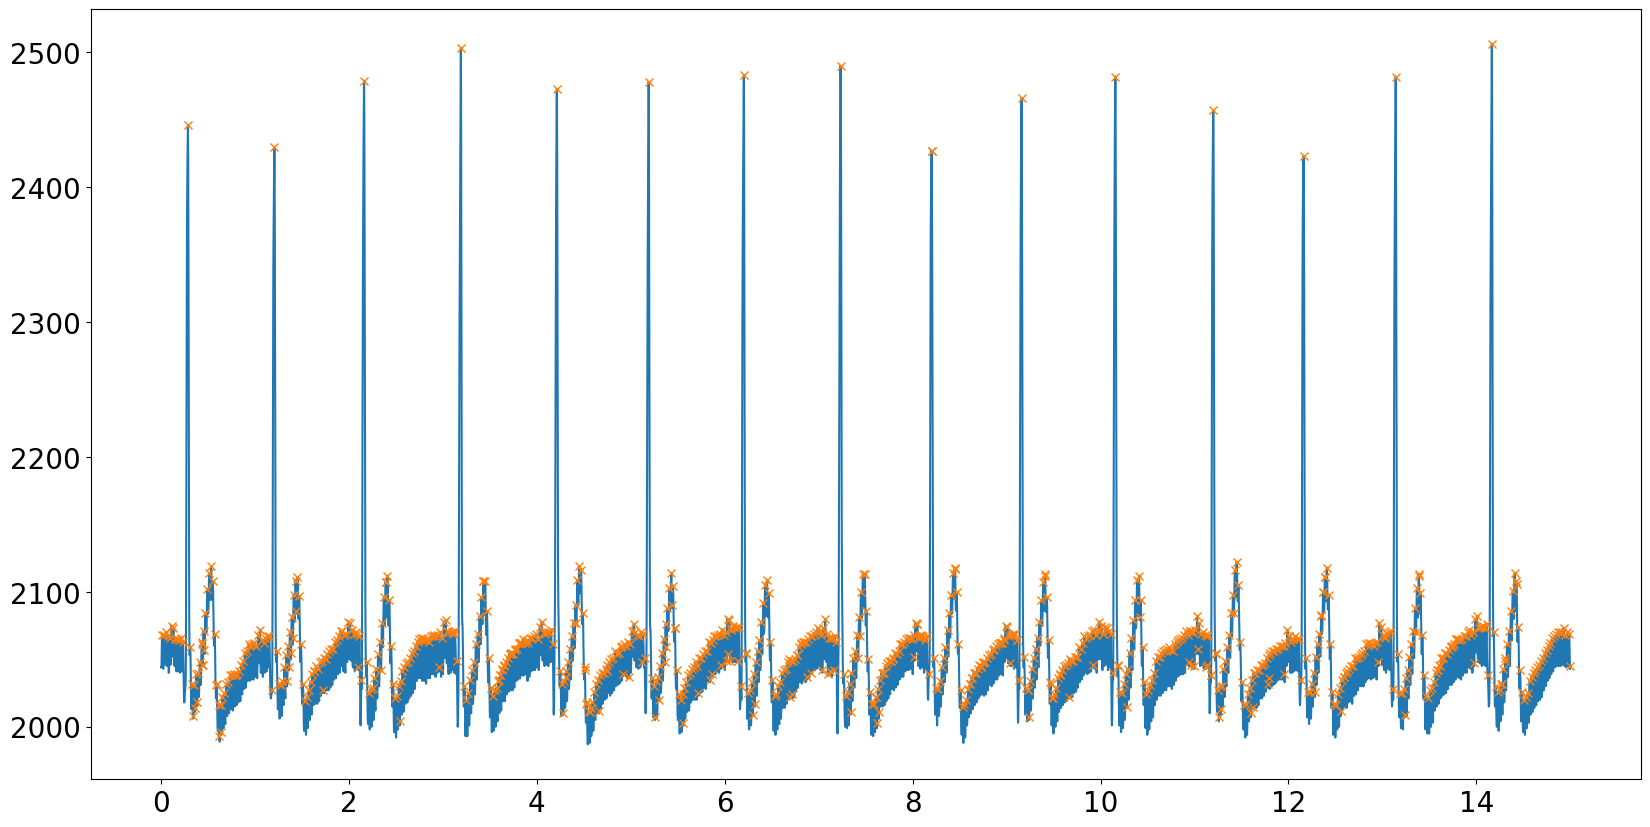

In [22]:
# Load the ECG example data
ecg_url = 'https://raw.githubusercontent.com/MedlyticsUniversal/Data/main/Week2/ecg.txt'
ecg_microvolts = np.loadtxt(ecg_url,skiprows=4)

# Import the `find_peaks` function
from scipy.signal import find_peaks

peaks, _ = find_peaks(ecg_microvolts)
sampling_interval = 1/1000
duration = 15000*sampling_interval
t = np.arange(0, duration, sampling_interval)

plt.figure(figsize=(20, 10))
plt.plot(t, ecg_microvolts)
plt.plot(t[peaks], ecg_microvolts[peaks], 'x')

### Exercise #4

1. Generate 5 sine waves with frequencies and amplitudes set based on 2 user-defined lists, then sum them into one signal.
2. Plot the 5 original sine waves and the combined signal.
3. Plot **x** markers at the peaks of the waves using `find_peaks`.

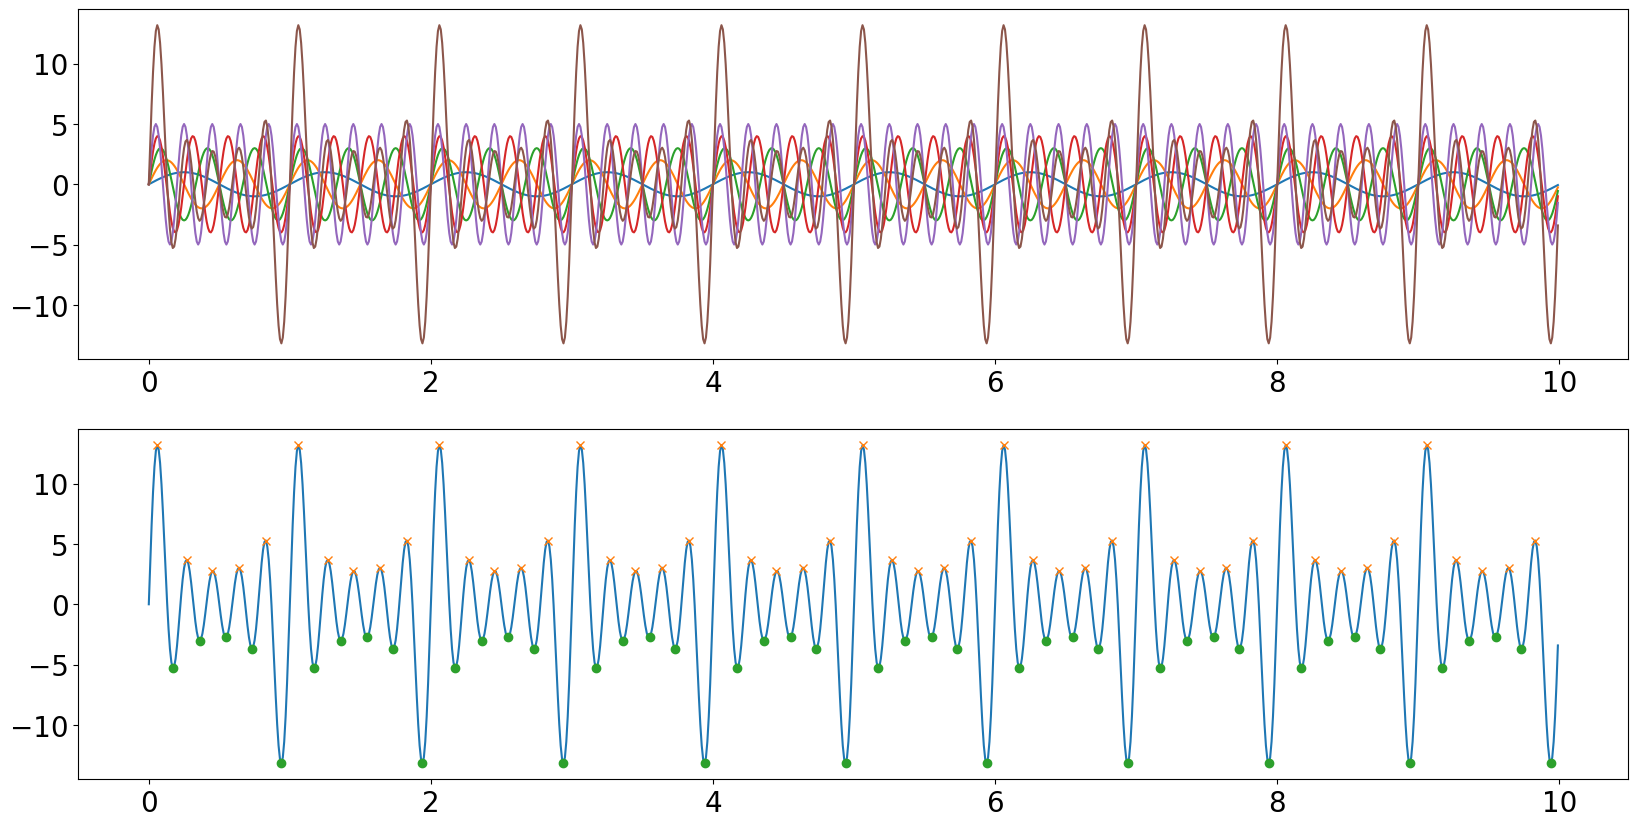

In [41]:
# YOUR CODE HERE

frequencies = [1, 2, 3, 4, 5]
amplitudes = [1, 2, 3, 4, 5]

sampling_interval = 0.01
duration = 10
t = np.arange(0, duration, sampling_interval)

final_signal = np.zeros((1000))

fig, axs = plt.subplots(2, figsize=(20, 10))

for i in range(5):
    omega = 2*np.pi*frequencies[i]
    signal = amplitudes[i] * np.sin(omega * t)
    axs[0].plot(t, signal)
    final_signal += signal

peaks, _ = find_peaks(final_signal)
valleys, _ = find_peaks(-final_signal)

axs[0].plot(t, final_signal)
axs[1].plot(t, final_signal)
axs[1].plot(t[peaks], final_signal[peaks], 'x')
axs[1].plot(t[valleys], final_signal[valleys], 'o')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=13ef7d9b-9924-4ad0-9a18-be211a370d52' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>